<a href="https://colab.research.google.com/github/jmora67248-ui/Ciencia-de-datos/blob/main/15septclase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agenda
1. Definir cenceptos
2. Cargar datos desde drive
3. Calculo de la desviación estándar
4. Exploracion de distribucion de datos (graficos)


##1. Definicion de conceptos
1.1 Varianza
1..2 Desnviacion estandar
1.3 Desviacion de la media absoluta
1.4 Desnviacción absoluta mediana de la mediana (MAD)
1.5 Rango
1.6 Estadistica ordinal
1.7 Percentil
1.8 Rango intercualtil (IQR)


##1.1 Varianza
Es una medida de dispersión que representa la variabilidad de una serie de datos respecto a su media. Se calcula como la suma de los cuadrados de las desviaciones de cada dato con respecto a la media, dividida por el número total de observaciones.

##1.2 Desviación Estándar
Indica qué tan dispersos están los datos con respecto a la media. Es simplemente la raíz cuadrada positiva de la Varianza. Un valor bajo sugiere que los datos tienden a estar cerca de la media, mientras que un valor alto indica mayor dispersión.

##1.3 Desviación Media Absoluta
Mide la dispersión promedio de un conjunto de datos. Se calcula como el promedio de las desviaciones absolutas de cada dato con respecto a la media, ofreciendo una visión directa de la distancia promedio de los puntos al centro de la distribución.

##1.4 Desviación Absoluta Mediana (MAD)
Es una medida robusta de la variabilidad de los datos, menos sensible a valores atípicos. Representa la mediana de las desviaciones absolutas de cada dato con respecto a la mediana del conjunto, ofreciendo una alternativa estable a la desviación estándar.

##1.5 Rango
Es la medida de dispersión más simple. Se calcula como la diferencia entre el valor máximo y el valor mínimo en un conjunto de datos. Ofrece una idea rápida de la amplitud total de los datos, aunque es muy sensible a valores extremos.

##1.6 Estadística Ordinal
Se refiere a estadísticas basadas en el orden de los datos, desde el más pequeño hasta el más grande. Estas métricas, como la mediana o los percentiles, son robustas y no se ven tan afectadas por valores atípicos como las basadas en la media.

##1.7 Percentil
Es una medida de posición que indica el valor por debajo del cual se encuentra un porcentaje determinado de las observaciones. Por ejemplo, el percentil 80 es el valor que supera al 80% de los datos del conjunto.

##1.8 Rango Intercuartílico (IQR)
Mide la dispersión del 50% central de los datos. Se calcula como la diferencia entre el tercer cuartil (percentil 75) y el primer cuartil (percentil 25). Es una medida de variabilidad robusta, útil para identificar valores atípicos.

In [1]:
!pip install statsmodels
!pip install wquantiles


In [ ]:
!pip install wquantiles

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
#from scipy import trim_mean
import matplotlib.pyplot as plt
from statsmodels import robust
import wquantiles
from google.colab import files



In [8]:
# Subir archivo CSV
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Leer archivo CSV
data  = pd.read_csv(filename)



Saving state.csv to state (2).csv


In [9]:
data.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [10]:
Mayor_poblacion = data.groupby(["Population"])["State"].max()
Mayor_poblacion

,State
Population,
563626,Wyoming
625741,Vermont
672591,North Dakota
710231,Alaska
814180,South Dakota
897934,Delaware
989415,Montana
1052567,Rhode Island
1316470,New Hampshire


In [11]:
data.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


In [14]:
#Calculando la desviacion estandar y los cuartiles
data["Population"].std()

6848235.347401142

In [15]:
data["Murder.Rate"].std()

1.915736124302923

In [16]:
robust.scale.mad(data["Population"])

np.float64(3849876.1459979336)

In [17]:
#Calcular el IQR
data.Population.quantile(0.75) - data.Population.quantile(0.25)

np.float64(4847308.0)

In [20]:
#Calcular el IQR de la tasa de asesinatos
data['Murder.Rate'].quantile(0.75) - data['Murder.Rate'].quantile(0.25)

np.float64(3.125)

In [21]:
robust.scale.mad(data["Population"])

np.float64(3849876.1459979336)

In [22]:
#Calcular el MAD de la tasa de asesinatos
robust.scale.mad(data["Murder.Rate"])

np.float64(2.3721635496089624)

In [23]:
## HINT - Trabajo con dataframes
data1 = {"Nombre": ["Camilo","Kevin","Santiago",],
        "Edades": ["10","15","3"],
        "Juegos": ["Basketball","Tenis de mesa", "Futbol"]
}
df = pd.DataFrame(data1)
df

,Nombre,Edades,Juegos
0,Camilo,10,Basketball
1,Kevin,15,Tenis de mesa
2,Santiago,3,Futbol


In [24]:
#Renombrar headers
df = df.rename(columns={"Edades": "Años","Juegos":"Deportes"})
df

,Nombre,Años,Deportes
0,Camilo,10,Basketball
1,Kevin,15,Tenis de mesa
2,Santiago,3,Futbol


In [27]:
data.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [ ]:
#Reemplazar headers de ingles a español
data = data.rename(columns={"Estado": "Poblacion","Tasa de asesinato":"Abreviacion"})
data

4. EXPLORACION EN LA DISTRIBUCION DE DATOS
4.1 Diagrama de caja (poner definicion e indicar como se lee)

4.2 Diagrama de frecuencias

4.3 Histograma

4.4 Diagrama de desnidad

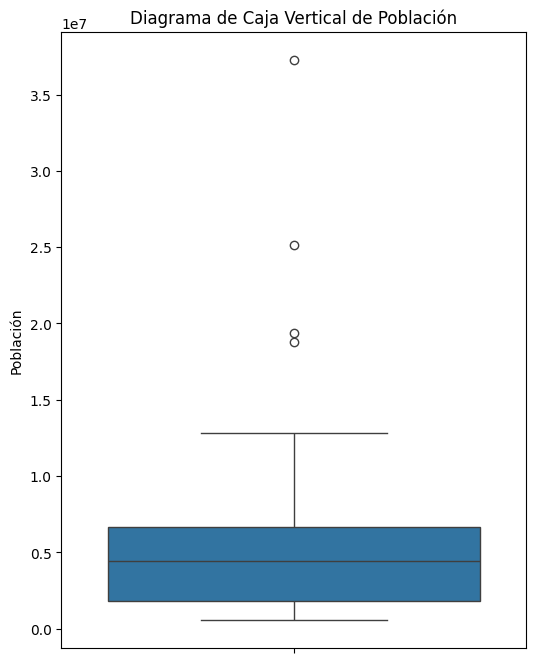

In [49]:
# --- Código para el gráfico vertical ---
plt.figure(figsize=(6, 8)) # Define el tamaño (ancho, alto)
sns.boxplot(y=data['Population']) # La clave es usar 'y' en lugar de 'x'
plt.title('Diagrama de Caja Vertical de Población') # Título del gráfico
plt.ylabel('Población') # Cambiamos la etiqueta a 'ylabel'
plt.show() # Muestra el gráfico

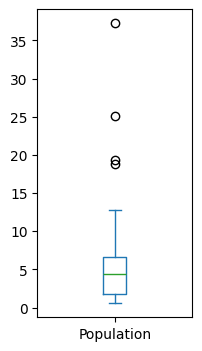

In [39]:
# --- 4.1 Código para el Diagrama de Caja ---

ax=(data.Population/1_000_000).plot.box(figsize=(2,4))
ax.set_label('Population')

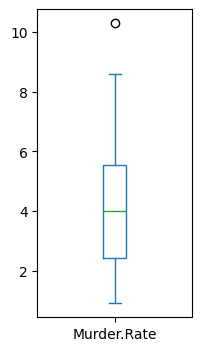

In [43]:
# --- 4.1 Código para el Diagrama de Caja ---

ax=(data['Murder.Rate']).plot.box(figsize=(2,4))
ax.set_label('Murder.Rate')

In [45]:
#Calculo de la tabla de frecuencia e histograma
binnedPopulation = pd.cut(data["Population"],10)
binnedPopulation.value_counts()

,count
Population,
"(526935.67, 4232659.0]",24
"(4232659.0, 7901692.0]",14
"(7901692.0, 11570725.0]",6
"(11570725.0, 15239758.0]",2
"(15239758.0, 18908791.0]",1
"(18908791.0, 22577824.0]",1
"(22577824.0, 26246857.0]",1
"(33584923.0, 37253956.0]",1
"(26246857.0, 29915890.0]",0


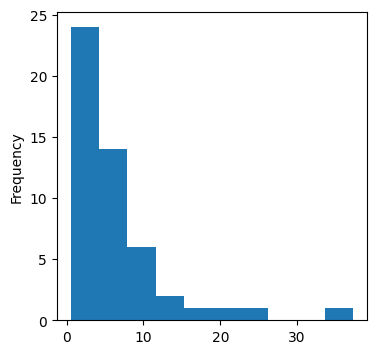

In [44]:
ax = (data.Population/1_000_000).plot.hist(figsize = (4,4))
ax.set_label('Population')

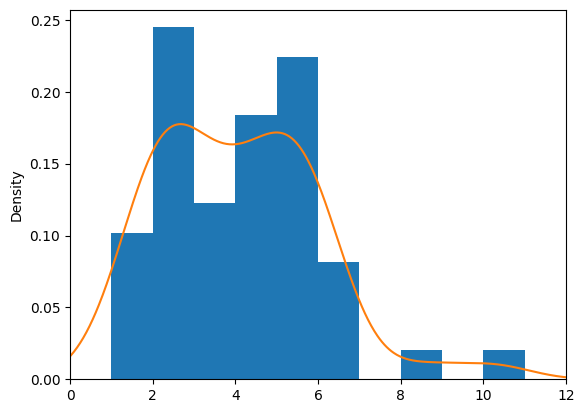

In [48]:
#diagrama de dispersion y curva de densidad
ax = data["Murder.Rate"].plot.hist(density = True, xlim = [0,12], bins = range(1,12))
data["Murder.Rate"].plot.density(ax = ax)
ax.set_label("Tasa de asesinatos por 1M de habitantes")